# Le jeu de données contaminé par le robot

### Import des librairies 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import random 
from sklearn.utils import shuffle
from decimal import Decimal
from sklearn import linear_model
from sklearn import metrics
from sklearn import cluster
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Definition de nos hypers-parametres 

In [8]:
#Seed utilisé pour générer le split entre X_train et X_test
seed = 2904

# % de colonnes gardées dans X_train
split = 0.8

### Question 1 

In [5]:
#Import de la base de donnée depuis internet
#Attention il n'y a pas de header, il faut donc le préciser lors de l'appel de la fonction
df_diab=pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", header=None, sep = ",")

#La derniere variable est la variable à expliquer, on la renomme Y par convention
df_diab.rename(columns={210: 'Y'}, inplace=True)

#On affiche le nombre de lignes de notre df :
n = len(df_diab)
print(f"Nombre d'observations : {n}")

#On affiche le nombre de variables explicatives, on enlève 1 au nombre de colonne car la dernière colonne est
#la variable à expliquer
p = len(df_diab.columns) - 1
print(f"Nombre de variables explicatives : {p}")


#On affiche les 5 premières lignes de la df
df_diab.head()


Nombre d'observations : 442
Nombre de variables explicatives : 210


,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,Y
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


### Question 2 

In [6]:
#describe nous donne des infos sur la répartition statistique des variables de la df
df_diab.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


On voit que la variable à expliquer (colonne Y) n'est ni centrée (Mean =\= 0), ni réduite (std =\= 1). 

Il semble en revanche que les variables explicatives sont centrées réduites, mais elles ne sont pas toutes facilement accessible via le describe, car beaucoup trop de colonnes.

Afin de s'assurer que toutes les variables explicatives sont centrées réduites, je vérifie à l'aide d'un petit algorithme qu'on a mean = 0 et std = 1 pour chaque colonne

In [221]:
L=[]
eps = 0.01
#On ajoute dans une liste les colonnes pour lesquelles la variable explicative n'est pas centrée réduite
for i in range(210):
    s=""
    mean = df_diab[i].mean()
    std = df_diab[i].std()
    if ((abs(mean) > eps) or (abs(std-1) > eps)):
        s+=f"La colonne {i} n'est pas centrée. "
    if abs(std-1) > eps:
        s+=f"La colonne {i} n'est pas réduite."
    if s:
        print(s)
        L.append(i)
if not L:
    print("Toutes les colonnes sont centrées réduites")


Toutes les colonnes sont centrées réduites


On voit bien que toutes nos colonnes sont donc centrées et réduites en dehors de la colonne 210 qui est notre variable à expliquer.

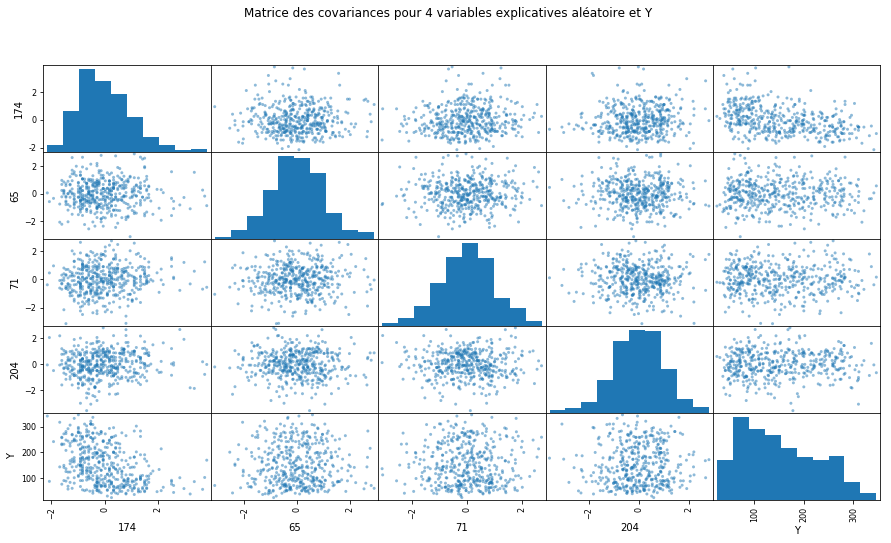

In [7]:
# On choisit 4 colonnes prises au hasard et on y ajoute la colonne de la variable à expliquer.

rand_columns = [random.randint(0,209) for i in range(4)]

#On ajoute Y
rand_columns.append("Y")

#On génère une sous dataframe composée uniquement de nos 5 colonnes
df_diab_5 = df_diab[rand_columns]

#On utilise la fonction scatter_matrix, qui nous trace directement ce que nous désirons.
scatter_matrix(df_diab_5,figsize=(15, 8))
plt.suptitle('Matrice des covariances pour 4 variables explicatives aléatoire et Y')
plt.show()

Les termes diagonaux représentent les histogrammes de la variable.
La première chose que l'on remarque est que la variable Y ne suit pas une loi normale en distribution.

On voit également, de manière général, que les variables sont décorélées les unes des autres. Le robot n'a pas construit les variables qu'il a ajouté comme combinaison linéaire les unes des autres.

Enfin, en regardant la corrélation entre Y et les autres variables explicatives, on constate, la plupart du temps, aucune corrélation évidente. La dataframe étant pollué par 200 variables non-explicatives, il y a très peu de chances de tomber sur une variable effectivement corrélée avec Y.

### Question 3

In [9]:
#On sépare les variables explicatives de la variable a expliquer
X_train, X_test, Y_train, Y_test = train_test_split(df_diab.drop("Y",axis=1), df_diab["Y"], test_size=(1-split), random_state=seed)

print(f"la df train possède : {len(X_train)} échantillons")
print(f"la df test possède : {len(X_test)} échantillons")

la df train possède : 353 échantillons
la df test possède : 89 échantillons


Text(0,0.5,'valeur propre')

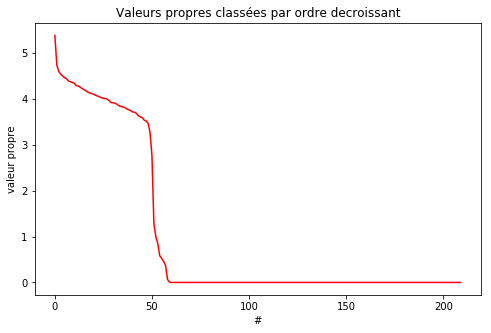

Comme son  nom l'indique, la matrice de corrélation représente les corrélations qu'il existe entre les covariables. Lorsqu'on la diagonalise, on se place dans un espace crée par des vecteurs combinaisons linéaires de nos variables de bases et seul la correlation

Lorsque les valeurs propres sont proches de 0 cela veut dire que la combinaison linéaire obtenue est insignifiante vis à vis des combinaisons linéaires grandes. 

On voit graphiquement qu'après les 60 premières valeurs propres, toutes les autres sont nulles, aussi il est cohérent de se limiter à uniquement 60 valeurs propres

### Question 4 

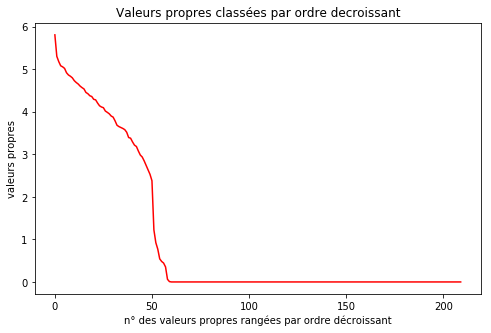

In [23]:
#On récupère la matrice de corrélation de X_train
corr_mat = X_train.corr()

#On diagonalise cette matrice
diag_corr_eigh = sorted(np.linalg.eigh(corr_mat)[0],reverse=True)

#nb de valeurs propres :
v = len(diag_corr_eigh)

#On prépare le graph de décroissance des valeurs propres
plt.figure(11,figsize=(8,5))
plt.plot(range(v),diag_corr_eigh,"r")
plt.title("Valeurs propres classées par ordre decroissant", fontsize = 12)
plt.xlabel("n° des valeurs propres rangées par ordre décroissant")
plt.ylabel("valeurs propres")

#On garde les 60 plus grands vecteurs propres
ACP_vect = np.linalg.eigh(corr_mat)[1][-60:]

La matrice de covariance représente la manière dont dépendent les variables les unes des autres.

Lorsqu'on la diagonalise, on se place dans un espace crée par des vecteurs combinaisons linéaires de nos variables de bases et seul la correlation

Lorsque les valeurs propres sont proches de 0 cela veut dire que la combinaison linéaire représenté par ce vecteur propre est liée aux autres vecteurs propres et possède de l'information redondante. Nous pouvons donc nous en passer.

On voit graphiquement qu'après les 60 premières valeurs propres, toutes les autres sont nulles, aussi il est cohérent de se limiter à uniquement 60 valeurs propres, et donc réduire notre base de donnée à la dimension 60.

### Question 5

In [36]:
#On reconstitue le dataset à l'aide les 60 relations contenues dans les vecteurs propres.
ACP_X_train = X_train@ACP_vect.T
ACP_X_test = X_test@ACP_vect.T

#On peut maintenant réaliser la regression linéaire à l'aide de sklearn sur le model ACP, et sur le model classique
#Par defaut fit_intercept = True
model_ACP = linear_model.LinearRegression().fit(ACP_X_train,Y_train)
model_simple = linear_model.LinearRegression().fit(X_train,Y_train)


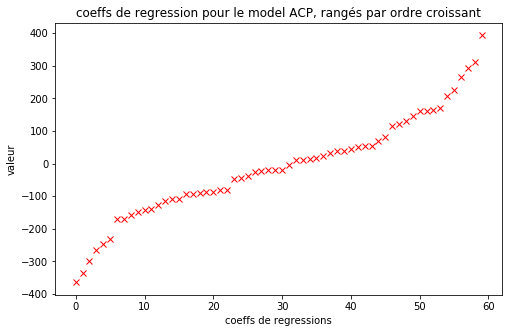

In [37]:
#On trace les valeurs de l'estimateur calculés, or intercept:
plt.figure(figsize=(8,5))
plt.plot(range(len(model_ACP.coef_)),sorted(model_ACP.coef_),"xr")
plt.title("coeffs de regression pour le model ACP, rangés par ordre croissant", fontsize = 12)
plt.xlabel("coeffs de regressions")
plt.ylabel("valeur")

plt.show()

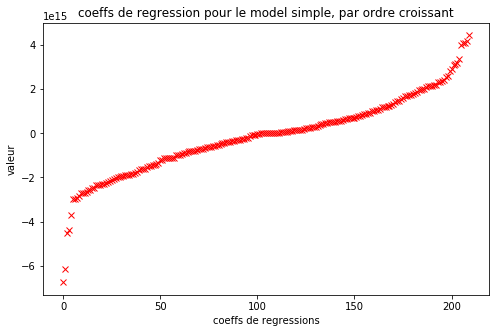

In [38]:
#On trace les valeurs de l'estimateur calculés, or intercept:
plt.figure(figsize=(8,5))
plt.plot(range(len(model_simple.coef_)),sorted(model_simple.coef_),"xr")
plt.title("coeffs de regression pour le model simple, par ordre croissant", fontsize = 12)
plt.xlabel("coeffs de regressions")
plt.ylabel("valeur")

plt.show()

On remarque que dans le modèle simple (OLS sans ACP), certains des coefficients de la regression explosent (10^15 !), là où on reste sur des valeurs raisonnables avec le modèle ACP (+/- 100).

Cela confirme ce qui a été vu en cours : lorsque des variables sont corrélés, les valeurs propres de la matrice de Gram sont très faible et les valeurs propres de l'inverse de la matrice de Gram très élevées, ce qui rend l'OLS instable.

### Question 6

In [44]:
#Valeurs de l'intercept pour les deux relations précedente
intercept_classique = model_classique.intercept_
intercept_ACP = model_ACP.intercept_

print(f"L'intercept pour le modèle classique vaut : {round(intercept_classique,4)}")
print(f"L'intercept pour le modèle ACP vaut : {round(intercept_ACP,4)}")

#On calcul la valeur moyenne de nos Y_train
avg_Y_train = Y_train.mean()

print(f"La moyenne de Y_train vaut : {round(avg_Y_train,4)}")

L'intercept pour le modèle classique vaut : 154.4255
L'intercept pour le modèle ACP vaut : 154.2615
La moyenne de Y_train vaut : 153.238


Normalement, l'intercept est égal exactement à la moyenne des Y pour des variables centrées. Ici les variables explicatives du modèle initiales ne sont pas exactement centrées réduites, puisque nous avons tronqué les données. 

De même les variables ACP ne sont pas centrées réduites par construction.  

In [45]:
#On centre et normalise les données venant de l'ACP
ACP_X_train_reduit=(ACP_X_train-ACP_X_train.mean())/ACP_X_train.std()

#On entraine notre nouveau modèle centré réduit 
model_ACP_reduit = linear_model.LinearRegression().fit(ACP_X_train_reduit,Y_train)
intercept_ACP_reduit = model_ACP_reduit.intercept_

print(f"L'intercept pour le modèle ACP reduit vaut : {round(intercept_ACP_reduit,4)}")
print(f"La moyenne de Y_train vaut : {round(avg_Y_train,4)}")

L'intercept pour le modèle ACP reduit vaut : 153.238
La moyenne de Y_train vaut : 153.238


Après recentrage, on retrouve bien l'intercept ACP = moyenne Y_train

### Question 7

In [53]:
#On calcul, pour le set test, la valeur des predictions
y_pred_simple = model_classique.predict(X_test)
y_pred_ACP = model_ACP.predict(ACP_X_test)

#On en déduit les résidus, dans les deux cas
eps_simple = Y_test - y_pred_simple
eps_ACP = Y_test - y_pred_ACP

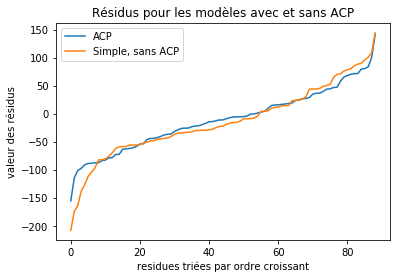

In [54]:
#On plot les résidues pour les deux OLS, avec et sans ACP
plt.plot(range(len(eps_ACP)),sorted(eps_ACP))
plt.plot(range(len(eps_classique)),sorted(eps_classique))
plt.legend(("ACP","Simple, sans ACP"))
plt.title("Résidus pour les modèles avec et sans ACP")
plt.xlabel("residues triées par ordre croissant")
plt.ylabel("valeur des résidus")
plt.show()
plt.show()

On voit graphiquement qu'en valeur absolue, l'erreur commise sur le modèle ACP semble plus faible que dans le modèle simple

Text(0,0.5,'valeur des résidus')

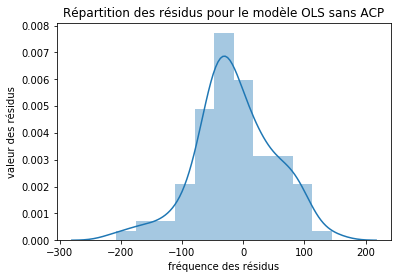

In [60]:
#Histograme des résidues cas classique, avec seaborn
sns.distplot(eps_simple);
plt.title("Répartition des résidus pour le modèle OLS sans ACP")
plt.xlabel("fréquence des résidus")
plt.ylabel("valeur des résidus")

Text(0,0.5,'valeur des résidus')

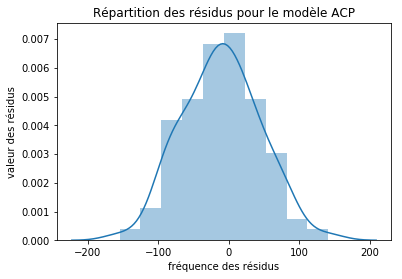

In [61]:
#Histograme des résidues ACP, avec seaborn
sns.distplot(eps_ACP);
plt.title("Répartition des résidus pour le modèle ACP")
plt.xlabel("fréquence des résidus")
plt.ylabel("valeur des résidus")

Encore une fois, on constate graphiquement que les résidues dans le modèle ACP sont plus réssérés que dans le modèle sans ACP

In [65]:
#On calcul le coefficient de determination dans les deux cas
r_simple = model_classique.score(X_test,Y_test)
r_ACP = model_ACP.score(ACP_X_test,Y_test)

print(f"Coefficient de determination, modèle OLS simple : {round(r_simple,4)}")
print(f"Coefficient de determination, modèle ACP : {round(r_ACP,4)}")

Coefficient de determination, modèle OLS simple : 0.2298
Coefficient de determination, modèle ACP : 0.4549


Le modèle ACP améliore donc le score du coefficient de détermination.

In [70]:
#On calcul le risque de prédiction pour l'échantillon test : 
risque_pred_simple = (Y_test-y_pred_simple).T@(Y_test-y_pred_simple)/len(Y_test)
risque_pred_ACP = (Y_test-y_pred_ACP).T@(Y_test-y_pred_ACP)/len(Y_test)

print(f"Le risque de prédiction du modèle OLS simple est {round(risque_pred_simple,4)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP,4)}")

Le risque de prédiction du modèle OLS simple est 4350.134
Le risque de prédiction du modèle ACP est 3078.6227


Le risque de prédiction est également réduit avec l'ACP par rapport à la modélisation simple

### Question 8 

Pour cette question, quelques petites explications sur les fonctions définies : 

one_clmn_reg réalise la régression linéaire à partir d'un df constitué d'une seule colonne, et renvoie un tuple contenant la stat T, la p-value, les coefs de regression, et le vecteur résidu après regression

best_p va lancer q fois (q le nombre de colonnes de la df) la fonction one_clmn_reg, et renvoit la meilleure colonne selectionnées ainsi que divers informations nécessaire pour afficher les graphiques à venir.

fwd_selection, enfin, réitère best_p tant que la dataframe possède des colonnes non séléctionnés. Il est possible d'utiliser un critère d'arrêt dans cette fonction afin de stopper automatiquement la loop lorsque les p dépassent une certaine valeur.

In [71]:
def one_clmn_reg(X,Y):
    """Output b and p"""
    X_mat = X.copy()
    
    #On calcul la regression linéaire pour X
    model = linear_model.LinearRegression().fit(X,Y)
    
    #On calcul également sigma
    sigma = np.sqrt((Y - model.predict(X_mat)).T@(Y - model.predict(X_mat))/(len(Y)-2))
    
    #On trouve b
    b=model.coef_[0]
    
    #On calcul la matrice de gram associée à X
    X_mat["intercect"]=np.ones(len(X))
    Gram =  X_mat.T@X_mat
    
    #On en déduit T
    T = abs(b/(sigma*np.sqrt((np.linalg.inv(Gram))[1,1])))
    #On calcul p 
    p = 2*(1-stats.norm.cdf(T))

    #On calcul le résidu
    r = Y - (X*b)[(X*b).columns[0]]

    
    return (T,p,b,r)

def best_p(X,Y):
    """Cherche la meilleur composante parmi les variables explicatives"""
    """On stock également la totalité des p value"""
    
    #Initiation des variables locales
    p_list = []
    T_list = []
    T_sup = 0
    b_sup = 0
    col_sup = X.columns[0]
    
    #On itère sur les colonnes de X, et on applique la regression linéaire
    for col in X.columns:
        T,p,b,r = one_clmn_reg(X[[col]],Y)
        
        #On ajoute aux listes les valeurs trouvés par la regression linéaire
        p_list.append(p)
        T_list.append(T)
        
        #On selectionne les valeurs de la regression de la colonne q si la T stat est meilleure
        if abs(T) > T_sup:
            T_sup = T
            b_sup = b
            r_sup = r
            col_sup = col
            p_sup = p
    return (p_sup, b_sup, r_sup, col_sup, p_list,T_list)

def fwd_selec(X,Y,eps=1):
    """Applique l'algorithme de fwd selection"""
    
    #On copie le df et initialisation des variables locales
    X_c = X.copy()
    p_l = []
    b_l = []
    col_l = []
    
    #full_p est la liste complète des p valeurs à chaque tour d'algoritme
    full_p = []
    full_T = []
    
    #On récupère l'intersept
    b0 = Y.mean()
    p=0
    
    #Calcul du premier résidu
    residu = Y - Y.mean()
    
    #On boucle tant que le palier de précision sur p n'est pas atteint, ou tant que X possède des colonnes non-utilisées
    while (p<eps and len(X_c.columns)):
        
        #Tant qu'il y a des colonnes de X, on cherche le coefficient dans la prochaine direction
        p,b,residu,col,p_list,T_list = best_p(X_c,residu)
        full_p.append((p_list,X_c.columns.values))
        full_T.append((T_list,X_c.columns.values))
        
        #On retire alors la colonne qui ne nous sert plus. 
        X_c.pop(col)
        
        #Mise à jour des listes
        p_l.append(p)
        b_l.append(b)
        col_l.append(col)
        
    return p_l,b_l,col_l,full_p,full_T

#On récupère toutes les infos de a fwd selection
p,b,col,full_p,full_T = fwd_selec(X_train,Y_train)


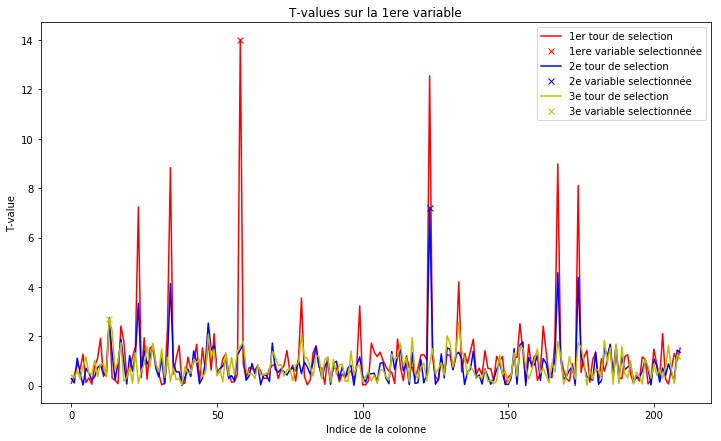

In [72]:
#On plot les valeurs des T_values et leurs valeurs
plt.figure(figsize=(12,7))
plt.plot(full_T[0][1],full_T[0][0],"r-")
plt.plot(col[0],max(full_T[0][0]),"rx")

plt.plot(full_T[1][1],full_T[1][0],"b-")
plt.plot(col[1],max(full_T[1][0]),"bx")

plt.plot(full_T[2][1],full_T[2][0],"y-")
plt.plot(col[2],max(full_T[2][0]),"yx")

plt.title("T-values sur la 1ere variable", fontsize = 12)
plt.xlabel("Indice de la colonne")
plt.ylabel("T-value")
plt.legend(("1er tour de selection","1ere variable selectionnée",
           "2e tour de selection","2e variable selectionnée",
           "3e tour de selection","3e variable selectionnée"))
plt.show()


On voit graphiquement que la colonne selectionnée (symbolisé par une croix) est celle pour laquelle la T-value est la plus grande à chaque tour d'enchère. Cela correspond bien à la p-value la plus petite.

Note perso : contrairement au cours je ne considère par l'intercept comme une variable à sélectionner. Pour moi la fwd selection sert à selectionner des variables parmis nos 210 candidates, l'intercept b0, égal à mean(Y) sera de toute façon toujours présent dans nos regressions par la suite.

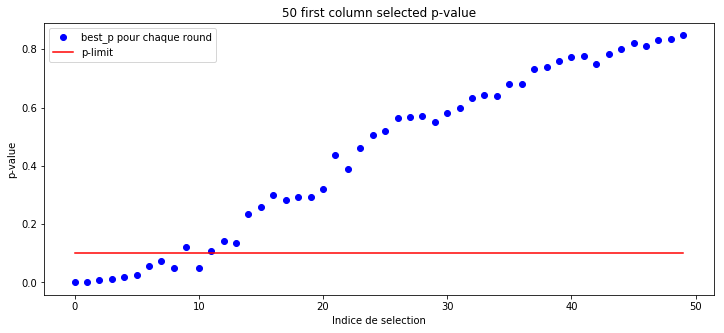

In [87]:
#On affiche le graph des 50 premières p-values
plt.figure(figsize=(12,5))
plt.plot(range(50),p[:50],"bo")
plt.plot(range(50),np.ones([50])*0.1,"r-")
plt.title("50 first column selected p-value", fontsize = 12)
plt.legend(("best_p pour chaque round","p-limit"))
plt.xlabel("Indice de selection")
plt.ylabel("p-value")

plt.show()

On selectionne uniquement les variables dont la p-value est inférieur à 0.1, on voit graphiquement que plus l'algorithme avance, plus les p-values sont grandes, et moins les variables explicatives ont d'intérêt.

In [73]:
#On zip les p values avec les colonnes associées
p_col = zip(p,col)
#On ne garde que les colonnes dont la p_value est supérieur à 0.1: 
fwd_col = [elmt[1] for elmt in p_col if elmt[0]<0.1]

print("Ci-dessous, la liste des variables explicatives gardées après selection fwd, dans l'ordre :")
print(fwd_col)

Ci-dessous, la liste des variables explicatives gardées après selection fwd, dans l'ordre :
[58, 123, 13, 133, 129, 167, 183, 14, 62, 135]


On voit que la fwd selection réduit considérablement la liste des variables. Attention néanmoins car cette liste est très variable suivant le split initial effectué.

In [75]:
#On applique la regression linéaire à la liste établi au dessus
model_fwd = linear_model.LinearRegression().fit(X_train[fwd_col],Y_train)
Y_fwd_pred = model_fwd.predict(X_test[fwd_col])
risk_predict_fwd = (Y_test - Y_fwd_pred).T@(Y_test - Y_fwd_pred)/len(Y_test)

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_simple)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP)}")
print(f"Risque de prediction après la fwd selection : {round(risk_predict_fwd)}")


Le risque de prédiction du modèle classique est 4350.0
Le risque de prédiction du modèle ACP est 3079.0
Risque de prediction après la fwd selection : 3158.0


On constate que le risque de prédiction avec nos variables séléctionnés est bien meilleur que le risque obtenue par la regression linéaire sur les 210 variables et est du même ordre de grandeur que celui de l'OLS avec ACP.

Encore une fois, nous expliquons mieux Y, et cela avec moins de variables explicatives :)

### Question 11

In [76]:
#On concatene les X et Y dans le même dataframe
df_train = X_train.copy()
df_train["Y"] = Y_train

#On mélange le tout
df_train_shuffle = shuffle(df_train)

#On split en 4 fold égaux
folds = np.split(df_train_shuffle, [int(0.25*len(df_train_shuffle)),
                                    int(0.5*len(df_train_shuffle)),
                                    int(0.75*len(df_train_shuffle))])

#On montre les index retenues pour chaque fold 
k=1
for fold in folds:
    print(f"Indexe retenu pour le fold {k} :\n {list(fold.index)} \n")
    k+=1

Indexe retenu pour le fold 1 :
 [213, 151, 435, 31, 36, 303, 66, 263, 139, 105, 184, 141, 227, 84, 210, 21, 220, 357, 166, 55, 112, 40, 13, 212, 121, 364, 235, 337, 135, 88, 73, 366, 199, 103, 106, 24, 189, 359, 331, 32, 367, 87, 8, 356, 131, 326, 423, 414, 270, 11, 19, 94, 217, 160, 336, 258, 393, 386, 376, 249, 153, 204, 354, 417, 136, 353, 37, 115, 114, 132, 3, 280, 137, 246, 343, 256, 38, 165, 120, 231, 327, 85, 440, 186, 190, 154, 90, 262] 

Indexe retenu pour le fold 2 :
 [133, 59, 307, 173, 268, 395, 288, 291, 236, 46, 276, 316, 298, 96, 206, 292, 174, 408, 405, 400, 370, 82, 319, 25, 172, 371, 157, 314, 129, 391, 426, 126, 340, 182, 240, 225, 299, 283, 97, 260, 83, 68, 33, 273, 410, 309, 122, 441, 230, 75, 238, 282, 10, 5, 60, 232, 411, 416, 191, 289, 128, 156, 179, 251, 427, 180, 26, 286, 150, 16, 253, 74, 42, 86, 117, 45, 23, 244, 81, 1, 113, 389, 49, 362, 69, 374, 294, 338] 

Indexe retenu pour le fold 3 :
 [207, 116, 346, 285, 312, 328, 89, 144, 98, 214, 293, 436, 177, 124,

### Question 12 

In [78]:
#Nos coefficients alpha, flemme de faire une comprehension de listes :)
alphas = [0.0001,0.0003,0.0006,
         0.001,0.003,0.006,
         0.01,0.03,0.06,
         0.1,0.3,0.6,
         1,3,6,
         10,30,60,
         100,300,600,
         1000,3000,6000
        ]

#On défini une fonction qui pour un set donné, calcul la regression avec ridge puis son score
def avg_ridge(df_list,alpha,X_t=X_test,Y_t=Y_test):
    
    err = 0 
    
    #On boucle sur les 4 folds, qui serviront à tour de rôle de set de test
    for i in range(len(df_list)):
        
        #On sépare le train set du test set pour un fold donnée - un fold sert pour le test, 
        #les trois autres pour le train
        df = df_list.copy()
        
        #Le set test, constitué d'un fold
        df_test = df.pop(i)
        Y_test = df_test["Y"]
        X_test = df_test.drop("Y",axis=1)
        
        #le set train constitué des trois autres folds
        df_train = pd.concat(df)
        X_train = df_train.drop("Y",axis=1)
        Y_train = df_train["Y"]
        
        #On cree le model de ridge à partir des folds de train
        mod = linear_model.Ridge(alpha).fit(X_train,Y_train)
        
        #On calcul l'erreur commis sur la prediction sur le fold test
        Y_pred = mod.predict(X_test)  
        err += (Y_test-Y_pred).T@(Y_test-Y_pred)/len(Y_test)
        
    #On renvoit l'erreur moyennée sur les 4 folds
    return err/4

In [83]:
R = []
rmin = 10000
alphabest = 0
for alpha in alphas:
    r = avg_ridge(folds,alpha)
    R.append(r)
    if r < rmin:
        alphabest= alpha
        rmin = r

print(f"Le meilleur alpha est alpha = {alphabest}")

Le meilleur alpha est alpha = 60


En fonction de la seed séléctionné, le paramètre alpha va varier entre 30 et 100. L'ordre de grandeur reste néanmoins le même

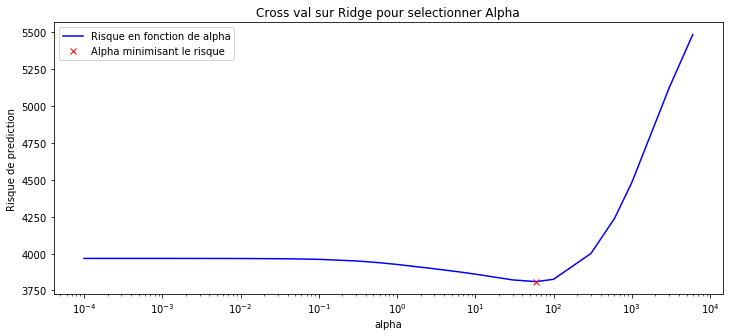

In [88]:
#On affiche le graph des 50 premières p-values
plt.figure(figsize=(12,5))
plt.plot((alphas),R,"b-")
plt.plot((alphabest),rmin,"rx")
plt.title("Cross val sur Ridge pour selectionner Alpha", fontsize = 12)
plt.legend(("Risque en fonction de alpha","Alpha minimisant le risque"))
plt.xlabel("alpha")
plt.ylabel("Risque de prediction")
plt.xscale("log")

plt.show()

Le paramètre alpha selectionné minimise le risque

In [90]:
#On calcul le risque associé
model_ridge = linear_model.Ridge(alphabest).fit(X_train,Y_train)
Y_ridge_pred = model_ridge.predict(X_test)
risk_ridge = (Y_test - Y_ridge_pred).T@(Y_test - Y_ridge_pred)/len(Y_test)

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_simple)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP)}")
print(f"Risque de prediction après la fwd selection : {round(risk_predict_fwd)}")
print(f"Risque de prediction après Ridge : {round(risk_ridge)}")

Le risque de prédiction du modèle classique est 4350.0
Le risque de prédiction du modèle ACP est 3079.0
Risque de prediction après la fwd selection : 3158.0
Risque de prediction après Ridge : 3036.0


### Question 13 

In [91]:
#On utilise la regression LassoCV de sklearn
model_lasso = linear_model.LassoCV().fit(X_train,Y_train)

#On en déduit le paramètre optimal de régulation
alpha = model_lasso.alpha_

print(f"Le paramètre optimal de régulation pour le Lasso est : {round(alpha,2)}")

#On calcul le risque de prédiction associé
y_pred_lasso = model_lasso.predict(X_test)

risk_lasso_opti = (Y_test - y_pred_lasso).T@(Y_test - y_pred_lasso)/len(Y_test)
print(f"Risque de prediction après Lasso : {round(risk_lasso_opti)}")

Le paramètre optimal de régulation pour le Lasso est : 7.1
Risque de prediction après Lasso : 3176.0


### Question 14

In [93]:
#On récupère tous les coefs de la regression Lasso
coefs = model_lasso.coef_
lasso_vars = []
i=0

#On récupère les coefficients non-nuls 
for coef in coefs:
    if abs(coef)>0.0001:
        lasso_vars.append(i)
    i+=1
print("Liste des coefficients non nuls selectionnés par Lasso :")
print(lasso_vars)
print("\n")

#On relance une regression linéaire classique à partir des variables selectionnés
model_lasso_OLS = linear_model.LinearRegression().fit(X_train[lasso_vars],Y_train)
y_pred_lasso_OLS = model_lasso_OLS.predict(X_test[lasso_vars])

#Le risque associé
risk_lasso_OLS = (Y_test - y_pred_lasso_OLS).T@(Y_test - y_pred_lasso_OLS)/len(Y_test)

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_simple)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP)}")
print(f"Risque de prediction après la fwd selection : {round(risk_predict_fwd)}")
print(f"Risque de prediction après Ridge : {round(risk_ridge)}")
print(f"Risque de prediction après Lasso : {round(risk_lasso_opti)}")
print(f"Risque de prediction OLS après selection Lasso : {round(risk_lasso_OLS)}")


Liste des coefficients non nuls selectionnés par Lasso :
[13, 58, 123, 167, 174]


Le risque de prédiction du modèle classique est 4350.0
Le risque de prédiction du modèle ACP est 3079.0
Risque de prediction après la fwd selection : 3158.0
Risque de prediction après Ridge : 3036.0
Risque de prediction après Lasso : 3176.0
Risque de prediction OLS après selection Lasso : 3168.0


Finalement, le Lasso nous permet de sélectionner les variables linéaires qui expliquent le mieux Y, ce qui nous permet en partie, de déjouer les plans du robot ! La selection reste cependant incomplète, ou biaisé par les variables aléatoires du robot, car l'échantillon initial est faible et les algorithmes peuvent voir des corrélations là où il n'y en a pas.

De même, certaines variables sont peut être corrélés à Y de manière non linéaire (ordre 2, 3 etc...) et cela, nos algorithmes ne permettent pas de le prendre en compte...

On voit d'ailleurs que malgré tout nos efforts, il est difficile de contenir le risque en dessous d'un seuil limite. Il faut donc explorer les pistes non linéaires.

### Question 15

Ici je me suis amusé un peu. On a vu que la selection des variables était très dépendante de la seed utilisé. Je me suis donc dis que ça pouvait être intéressant de faire une approche statistique sur les variables séléctionnées en changeant le paramètre seed et en gardant les paramètres qui avait la plus grande probabilité d'être sélectionnés par le Lasso. Une sorte de Bootstrap quoi...

Une fois ces variables choisies, je suis passé à l'ordre 2 en multipliant les colonnes entres elles. Encore une fois, toutes les relations n'ont pas forcement le même intéret et je refais une crossvalidation à l'aide de Lasso pour garder uniquement les variables ayant le plus de poid dans la regression non linéaire, toujours avec cette idée d'approche probabilistique sur les variables séléctionnées par le LassoCV.

J'ai également fait un test à l'ordre 3, mais moins concluant et l'algo prenait pas mal de temps donc j'ai laissé tombé l'idée.

In [102]:
def best_seeds(df,i=10000):
    """selectionne les seeds donnant les meilleurs coefficients de détermination sur le modèle simple"""
    seeds=[]
    for i in range(i):
        u = random.randint(1, 10000)
        Y = df["Y"]
        X = df.drop("Y",axis=1)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=u)
        model = linear_model.LinearRegression().fit(X_train,Y_train)
        s = model.score(X_test,Y_test)
        seeds.append((s,u))
    return sorted(seeds,key=lambda x:x[0])[-100:]

def top_Lasso(X_train,Y_train, j=20):
    """ Selection des variables déterminantes grace à LassoCV"""
    alphas = [0.0001,0.0003,0.0006,
             0.001,0.003,0.006,
             0.01,0.03,0.06,
             0.1,0.3,0.6,
             1,3,6,
             10,30,60,
             100,300,600,
             1000,3000,6000
            ]
    for a in alphas:
        lasso_vars = []
        i=0
        model = linear_model.Lasso(alpha=a).fit(X_train,Y_train)
        coefs = model.coef_
        for coef in coefs:
            if abs(coef)>0.0001:
                lasso_vars.append(X_train.columns[i])
            i+=1
        if len(lasso_vars)<j:
            alpha = a/3
            break
    return lasso_vars

def top_var_Lasso(dff,a=10,seeds = []):
    """Selection des variables basé sur leur probabilité d'être selectionné par le Lasso pour une seed donnée"""
    if not seeds :
        seeds = [random.randint(0,100000) for i in range(100)]
    
    df = dff.copy()

    columns = df.columns
    dict_lass = {c:0 for c in columns}
    for seed in seeds:
        Y = df["Y"]
        X = df.drop("Y",axis=1)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed) 
        lasso_vars = top_Lasso(X_train,Y_train)
        for v in lasso_vars:
            dict_lass[v]+=1

    return sorted([item for item in dict_lass.items() if item[1]>a],key=lambda x:x[1])

def poly_var(df,column,seeds):
    """Augmente la base de donnée en y ajoutant les indices d'ordre 2"""
    #Increase the number of variables based on a column i
    new_df = df.copy()
    Xi = df[column]
    
    #On ajoute les colonnes de rang 2 
    for col in df.columns:
        if not col == "Y":
            col_name = f"{column}x{col}"
            new_df[col_name] = Xi*df[col]
    
    #On applique la selection des variables via lasso
    varia = top_var_Lasso(new_df,a=70,seeds=seeds)
    v = [v[0] for v in varia]
    return new_df[v]

def Non_linear_Lasso(dff):
    """Applique notre algo maison de selection des variables non linéaire à l'ordre 2, renvoit le nouveau df constitué"""
    df = dff.copy()
    df_ = df.copy()
    #Selection préliminaire de variables
    var_lasso = top_var_Lasso(df)
    var_ = [v[0] for v in var_lasso]
    var_.append("Y")
    df_ = df[var_]
    
    print("variables prelim DONE")
    #On cherche les 100 seeds les plus adaptées au probleme
    seeds = [s[1] for s in best_seeds(df)]
    
    #On recalcul les variables, en étant plus sélectif
    t = [v[0] for v in top_var_Lasso(df_diab,a=20,seeds = seeds)]
    df_ = df[t]
    df_["Y"]=df["Y"]
    u = []
    
    print("seeds opti OK")
    #On calcul les regressions linéaires d'ordre 2 les plus significatives
    for col in df_.columns:
        if not col == "Y":
            u.append(poly_var(df_,col,seeds))
    
    print("Reg d'ordre 2 check !")
    #On merge nos dataframes avec nos nouvelles colonnes crées
    df_ = u[0]
    
    for i in range(1,len(u)):
        df_ = pd.merge(df_,u[i])
    
    return df_

In [103]:
#On calcul la dataframe ajusté avec notre méthode maison ! 
#L'algo est constitué de 3 steps, j'ai mis des prints pour que le temps soit moins long... :) 
dff = Non_linear_Lasso(df_diab)

variables prelim DONE
seeds opti OK
Reg d'ordre 2 check !


In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(dff, df_diab["Y"], test_size=0.2, random_state=seed)
model_nl = linear_model.RidgeCV().fit(X_train,Y_train)
r_nl = model_nl.score(X_test,Y_test)
Y_pred_nl = model_nl.predict(X_test)
risk_nl = (Y_pred_nl - Y_test).T@(Y_pred_nl - Y_test)/len(Y_pred_nl)

print(f"Le risque de prédiction du modèle classique est {round(risque_pred_simple)}")
print(f"Le risque de prédiction du modèle ACP est {round(risque_pred_ACP)}")
print(f"Risque de prediction après la fwd selection : {round(risk_predict_fwd)}")
print(f"Risque de prediction après Ridge : {round(risk_ridge)}")
print(f"Risque de prediction après Lasso : {round(risk_lasso_opti)}")
print(f"Risque de prediction OLS après selection Lasso : {round(risk_lasso_OLS)}")
print(f"Risque de prediction OLS après non-linear Lasso : {round(risk_nl)}")

print("\n")
print(f"Coefficient de determination, modèle OLS simple : {round(r_simple,4)}")
print(f"Coefficient de determination, modèle ACP : {round(r_ACP,4)}")
print(f"Coefficient de determination, modèle NL : {round(r_nl,4)}")

Le risque de prédiction du modèle classique est 4350.0
Le risque de prédiction du modèle ACP est 3079.0
Risque de prediction après la fwd selection : 3158.0
Risque de prediction après Ridge : 3036.0
Risque de prediction après Lasso : 3176.0
Risque de prediction OLS après selection Lasso : 3168.0
Risque de prediction OLS après non-linear Lasso : 2509.0


Coefficient de determination, modèle OLS simple : 0.2298
Coefficient de determination, modèle ACP : 0.4549
Coefficient de determination, modèle NL : 0.5558


Cette fois je suis plutôt satisfait puisque mon modèle d'ordre 2 permet de réduire de 20% le risque de prédiction par rapport aux modèles précédents !